By default it runs the kernel on the login node.

To run on a different node:
<ol>
  <li>Switch to node in a terminal.</li>
  <li>Run jupyter-notebook from terminal.</li>
  <li>Choose the kernel by typing in the server.</li>
</ol>

And the following command should show the correct node as verification.

In [1]:
!echo $HOSTNAME

n-62-20-9


In [2]:
import os
import numpy as np

In [3]:
from cil.io import NikonDataReader, RAWFileWriter, TIFFStackReader, TIFFWriter
from cil.utilities.jupyter import islicer
from cil.utilities.display import show_geometry, show2D
from cil.recon import FDK
from cil.plugins.tigre import FBP, ProjectionOperator
from cil.processors import TransmissionAbsorptionConverter, Slicer
from cil.optimisation.algorithms import CGLS, SIRT

In [4]:
path = os.path.abspath("/dtu/3d-imaging-center/projects/2022_DANFIX_Vindelev/raw_data_3DIM/VKH8206-X20 [2022-02-08 10.27.26]/VKH8206-X20.xtekct")
reader = NikonDataReader(file_name=path)

In [5]:
data = reader.read()

In [6]:
type(data)

cil.framework.framework.AcquisitionData

In [7]:
print(data)

Number of dimensions: 3
Shape: (1571, 1000, 1000)
Axis labels: ('angle', 'vertical', 'horizontal')



In [8]:
type(data.geometry)

cil.framework.framework.AcquisitionGeometry

In [9]:
ag = data.geometry

In [10]:
print(ag)

3D Cone-beam tomography
System configuration:
	Source position: [   0.        , -255.77484131,    0.        ]
	Rotation axis position: [-0.,  0.,  0.]
	Rotation axis direction: [0., 0., 1.]
	Detector position: [ -0.        , 855.97315869,   0.        ]
	Detector direction x: [1., 0., 0.]
	Detector direction y: [0., 0., 1.]
Panel configuration:
	Number of pixels: [1000 1000]
	Pixel size: [0.4 0.4]
	Pixel origin: top-right
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 1571
	Angles 0-20 in degrees:
[180.     , 179.77084, 179.54169, 179.31255, 179.08339, 178.85423,
 178.62508, 178.39592, 178.16678, 177.93762, 177.70847, 177.47931,
 177.25015, 177.02101, 176.79185, 176.5627 , 176.33354, 176.10439,
 175.87524, 175.64609]
Distances in units: units distance


In [11]:
ig = ag.get_ImageGeometry()

In [12]:
print(ig)

Number of channels: 1
channel_spacing: 1.0
voxel_num : x1000,y1000,z1000
voxel_size : x0.09202619345700429,y0.09202619345700429,z0.09202619345700429
center : x0,y0,z0



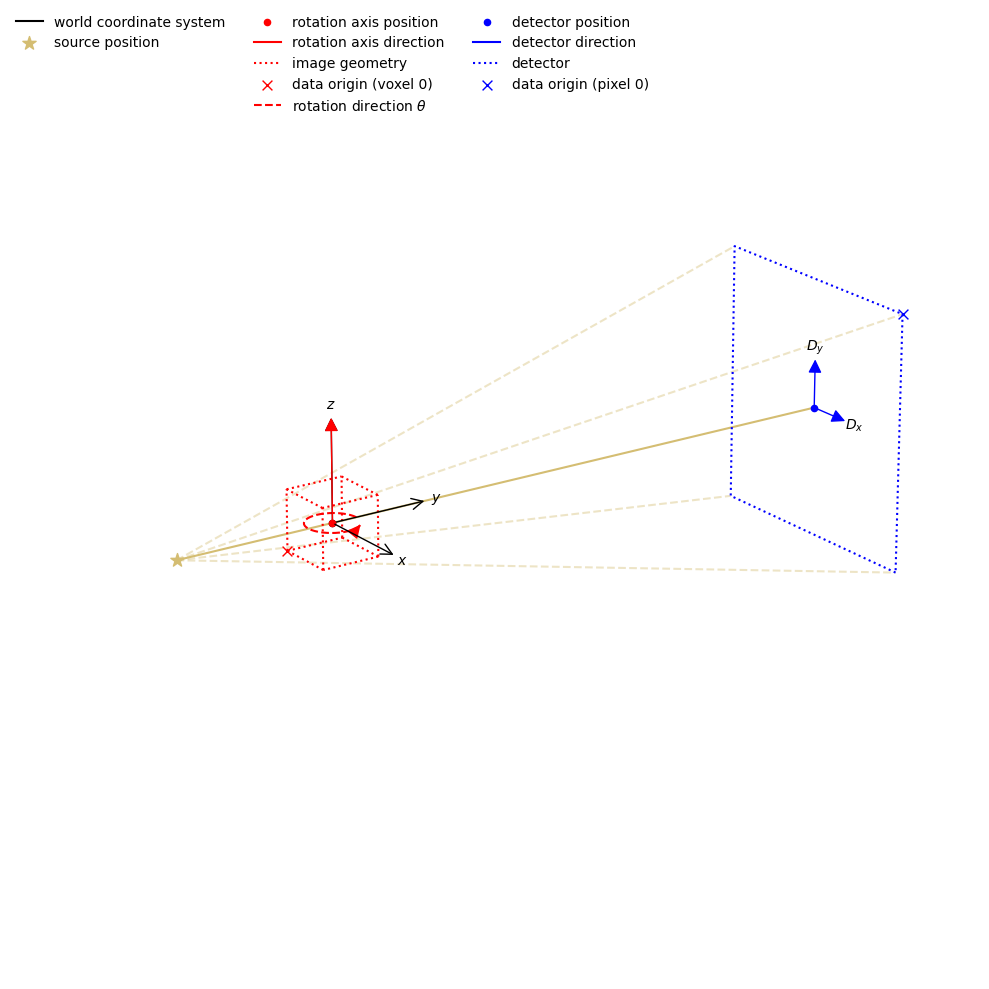

In [13]:
show_geometry(ag, ig)

In [14]:
data_centre = data.get_slice(vertical='centre')

In [1]:
base_dir = os.path.abspath('/dtu/3d-imaging-center/projects/2022_DANFIX_Vindelev/analysis/s214743_bsc/')
file_path = os.path.join(base_dir,'centres/X20.tif')
file_path

NameError: name 'os' is not defined

In [5]:
import pickle

In [27]:
# base_dir = os.path.abspath('/dtu/3d-imaging-center/projects/2022_DANFIX_Vindelev/analysis/s214743_bsc/')
# file_path = os.path.join(base_dir,'centres/X20.pkl')
# with open(file_path, 'wb') as file:
#     pickle.dump(data_centre, file)

In [6]:
base_dir = os.path.abspath('/dtu/3d-imaging-center/projects/2022_DANFIX_Vindelev/analysis/s214743_bsc/')
file_path = os.path.join(base_dir,'centres/X16.pkl')
with open(file_path, 'rb') as file:
    data_centre = pickle.load(file)

# Now `loaded_object` is the same as `complex_object`
print(data_centre)
data_centre

Number of dimensions: 2
Shape: (3142, 2000)
Axis labels: ('angle', 'horizontal')



In [16]:
data_centre

In [15]:
print(data_centre)

Number of dimensions: 2
Shape: (1571, 1000)
Axis labels: ('angle', 'horizontal')



In [7]:
ag_centre = data_centre.geometry

In [8]:
print(ag_centre)

2D Cone-beam tomography
System configuration:
	Source position: [   0.        , -114.42489624]
	Rotation axis position: [0., 0.]
	Detector position: [  0.        , 997.32310376]
	Detector direction x: [1., 0.]
Panel configuration:
	Number of pixels: [2000    1]
	Pixel size: [0.2 0.2]
	Pixel origin: top-right
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 3142
	Angles 0-20 in degrees:
[-95.      , -95.11456 , -95.229126, -95.34369 , -95.45822 , -95.572784,
 -95.68735 , -95.80191 , -95.91647 , -96.03104 , -96.1456  , -96.26013 ,
 -96.374695, -96.48926 , -96.60382 , -96.71838 , -96.83295 , -96.94751 ,
 -97.06207 , -97.176605]
Distances in units: units distance


In [9]:
ig_centre = ag_centre.get_ImageGeometry()

In [10]:
print(ig_centre)

Number of channels: 1
channel_spacing: 1.0
voxel_num : x2000,y2000
voxel_size : x0.02058468218341459,y0.02058468218341459
center : x0,y0



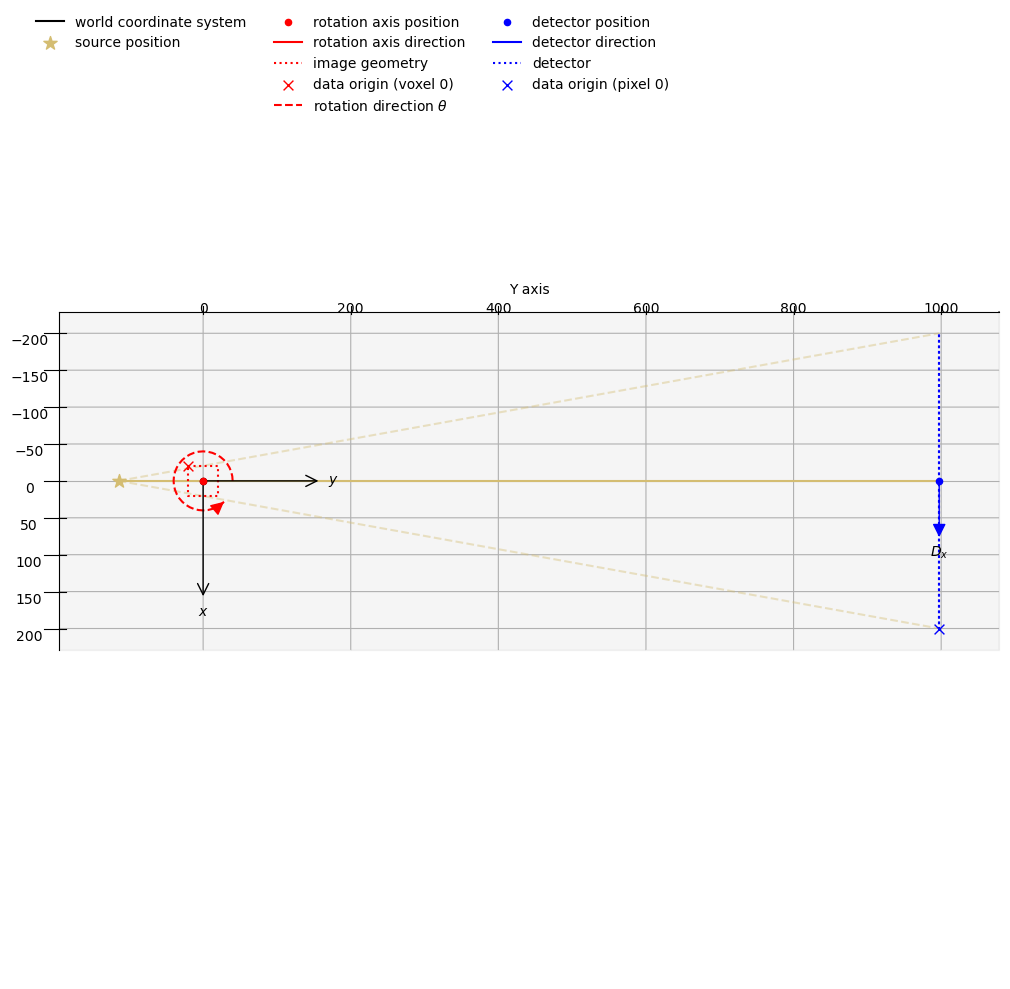

In [11]:
show_geometry(ag_centre,ig_centre, grid=True)

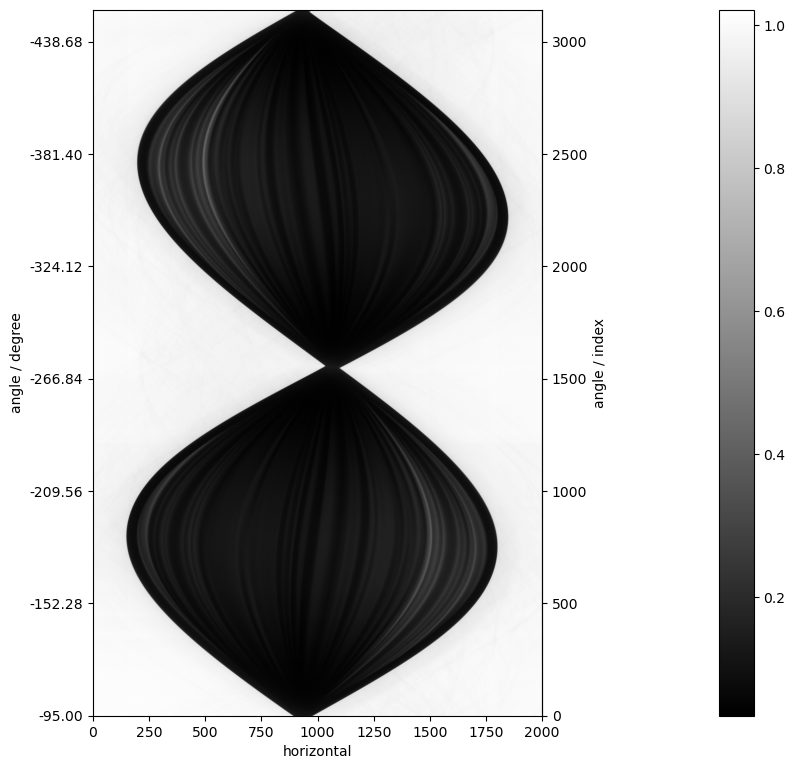

In [12]:
show2D(data_centre)

In [13]:
data_centre.min(), data_centre.max()

(0.034325, 1.02105)

In [14]:
data_centre /= data_centre.max()

In [15]:
data_centre.min(), data_centre.max()

(0.033617355, 1.0)

-0.0 3.3927128


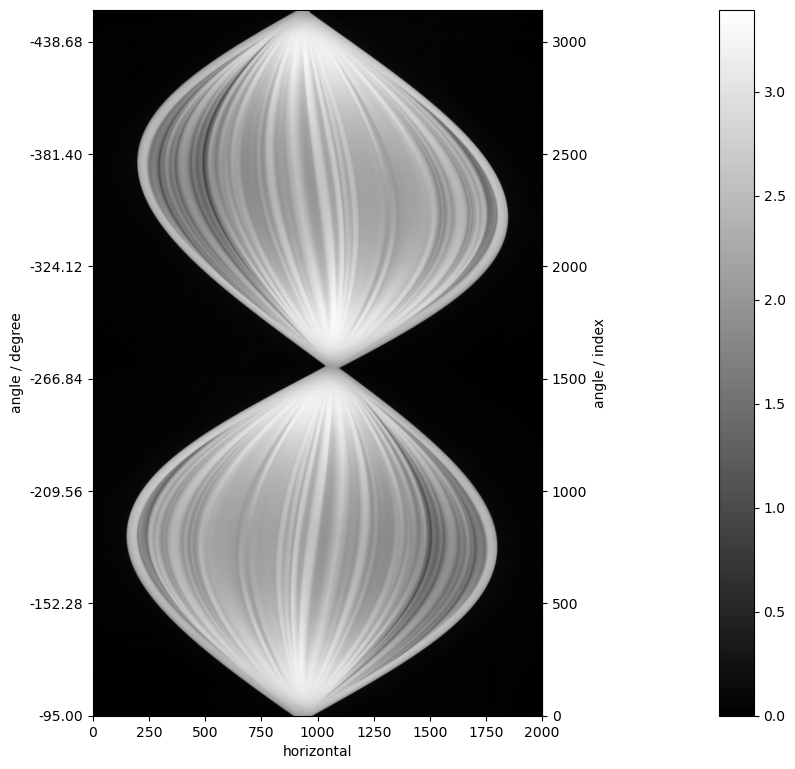

In [16]:
data_centre = TransmissionAbsorptionConverter()(data_centre)
print(data_centre.min(), data_centre.max())
show2D(data_centre)

In [17]:
print(data_centre)

Number of dimensions: 2
Shape: (3142, 2000)
Axis labels: ('angle', 'horizontal')



In [18]:
data_centre.reorder('tigre')

In [19]:
print(data_centre)

Number of dimensions: 2
Shape: (3142, 2000)
Axis labels: ('angle', 'horizontal')



In [20]:
fdk = FDK(data_centre, ig_centre)

In [21]:
fdk

In [22]:
print(fdk)

FDK recon

Input Data:
	angle: 3142
	horizontal: 2000

Reconstruction Volume:
	horizontal_y: 2000
	horizontal_x: 2000

Reconstruction Options:
	Backend: tigre
	Filter: ram-lak
	Filter cut-off frequency: 1.0
	FFT order: 12
	Filter_inplace: False



In [23]:
recon_centre = fdk.run()

: 

: 

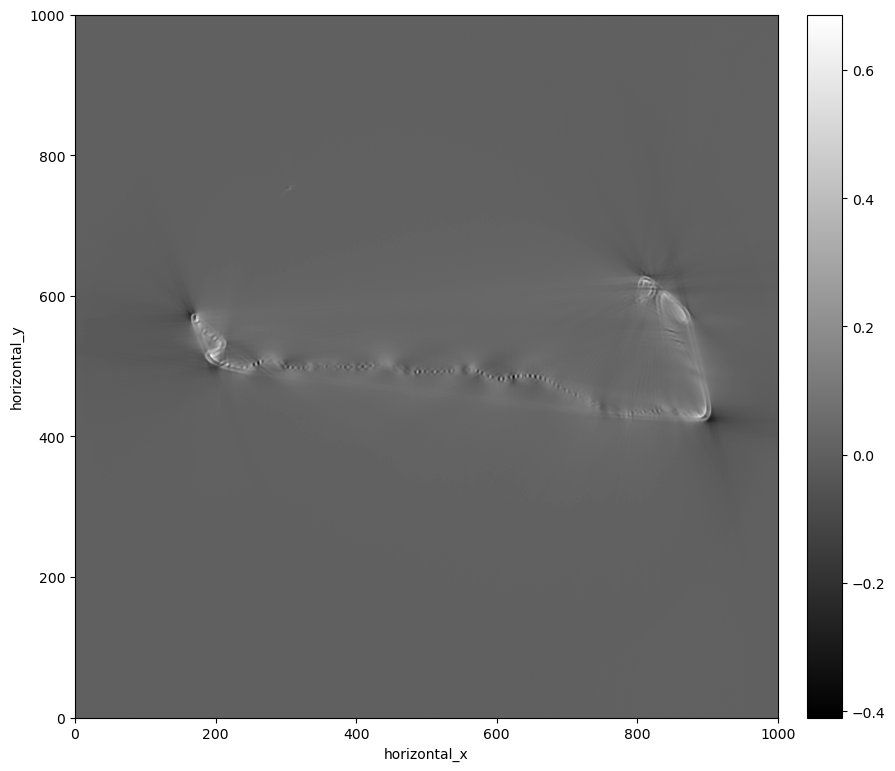

In [37]:
show2D(recon_centre)

In [38]:
# A = ProjectionOperator(ig_centre,ag_centre)
# b = data_centre
# x0 = ig_centre.allocate(0.0)

In [39]:
# myCGLS = CGLS(initial=x0, operator=A, data=b, max_iteration=1000)
# myCGLS.run(20,verbose=1)

In [40]:
# mySIRT = SIRT(initial=x0, operator=A, data=b, max_iteration=1000, LOWER=0.0)
# myCGLS.run(20,verbose=1)